# Convolutional kernels - Blurring and thresholding

In [62]:
# include home directory in our path
import os
import sys
sys.path.append("..")
# image processing and numerical tools
import cv2
import numpy as np 
# plotting utils
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt


In [3]:
filepath = os.path.join("..","..","..", "cds-vis-data", "data", "img", "trex.png")

In [4]:
image = cv2.imread(filepath)

## Blurring with convolutional kernels

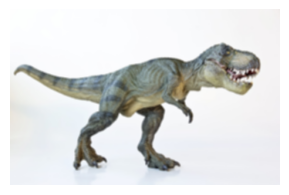

In [6]:
show(cv2.blur(image, (3,3))) # show trex with default averaging blur

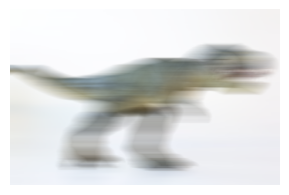

In [17]:
show(cv2.blur(image, (50,1))) # trex rapido

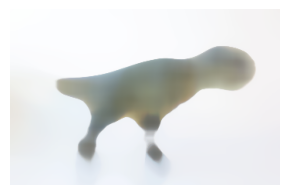

In [32]:
show(cv2.medianBlur(image, 41)) # median blur only accepts one value (assumes 3x3) 

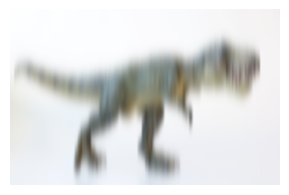

In [36]:
show(cv2.GaussianBlur(image, (3,53), 0)) # gaussian (falling trex)

In [37]:
blurred_stack = np.hstack([
    cv2.blur(image, (50,1)),
    cv2.medianBlur(image, 41),
    cv2.GaussianBlur(image, (3,53), 0)
])

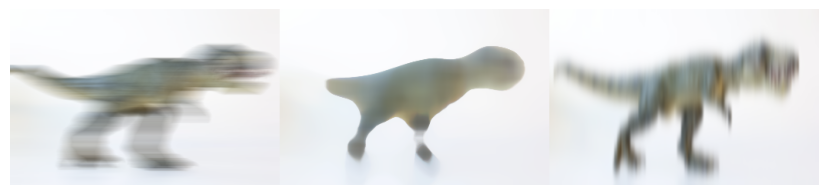

In [38]:
show(blurred_stack)

## Thresholding

In [39]:
image = cv2.imread(filepath)

In [40]:
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

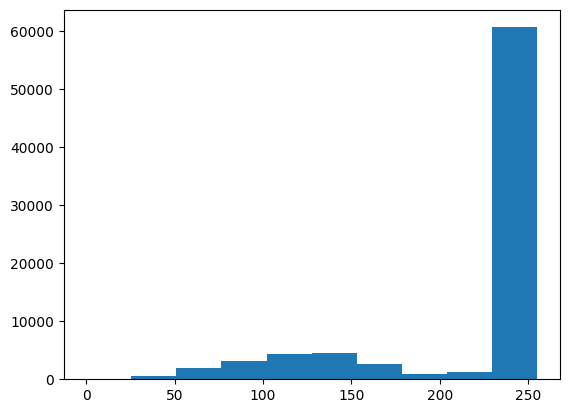

In [43]:
plt.hist(grey.flatten(), 10)
plt.show()

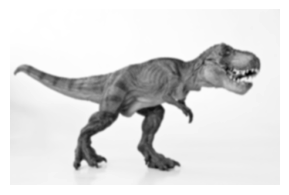

In [46]:
blurred = cv2.GaussianBlur(grey, (5,5), 0)
show_channel(blurred)

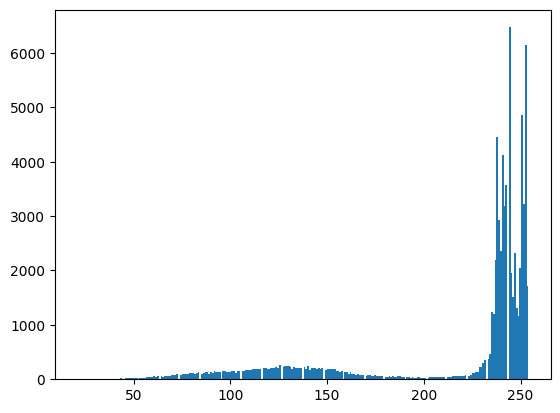

In [47]:
plt.hist(blurred.flatten(), 255)
plt.show()

In [49]:
binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY) # set threshold at 200, values above set to 255

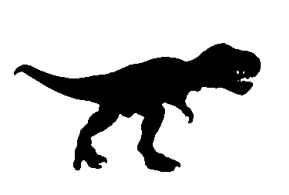

In [51]:
show_channel(binary_image[1])

In [52]:
threshold_val, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY) # first tuple value is seperated

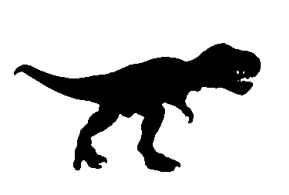

In [53]:
show_channel(binary_image)

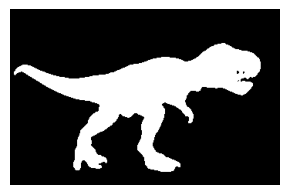

In [54]:
show_channel(cv2.bitwise_not(binary_image))


In [55]:
threshold_val, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV) # directly inverted

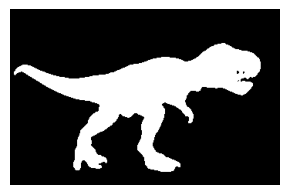

In [56]:
show_channel(binary_image)

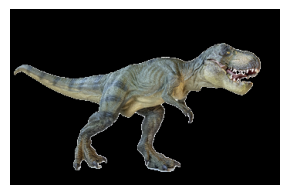

In [58]:
show(cv2.bitwise_and(image, image, mask = binary_image))

# Sobel

In [59]:
sobel_horizontal = cv2.Sobel(grey, cv2.CV_64F, 1, 0)
sobel_vertical = cv2.Sobel(grey, cv2.CV_64F, 0, 1)

In [64]:
sobel_horizontal = np.uint8(np.absolute(sobel_horizontal))
sobel_vertical = np.uint8(np.absolute(sobel_vertical))

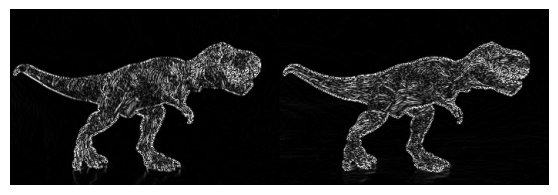

In [65]:
edges = np.hstack([
    sobel_horizontal,
    sobel_vertical
])
show_channel(edges)